## HR ANALYTICS- SALARY PREDICTION

The goal of this project is to clean the data, analysis and predict whether a person's salary is higher or lower than $50k/year based on their attributes using several Machine language Classification techniques.

## Loading Dataset into Python environment

**Imported Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loaded Dataset**

In [2]:
sal_data=pd.read_csv(r'C:\Users\Admin\Downloads\salarydata.csv')

**Understanding the dataset**

In [3]:
#Displayed the top 5 rows of the data
sal_data.head()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Shape of the data
sal_data.shape

(32561, 14)

In [5]:
# Statistical SUmmary of data
sal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# Information about the data
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
 #Found the number of unique values of each column
sal_data.nunique()

age                73
workclass           9
education          16
education-num      16
marital_status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours_per_week     94
native-country     42
salary              2
dtype: int64

In [8]:
# Displayed the unique values in each column
for i in sal_data.columns:
    print(i)
    print(sal_data[i].unique())
    print("-"*50)
    print("\n")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------------------------------------


marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------


oc

In [9]:
# value_counts of each column
def count_checker(sal_data):
    """count of each value under each feature in the data"""
    for col in sal_data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(sal_data[col].value_counts(),"\n")
        print("*"*40)

## Data Cleaning

In [10]:
# Finding which all columns have '?' in their values
sal_data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

**Missing Values**

In [11]:
#Handling missing values
# the code will replace the special character to nan  
sal_data['native-country'] = sal_data['native-country'].replace('?',np.nan)
sal_data['workclass'] = sal_data['workclass'].replace('?',np.nan)
sal_data['occupation'] = sal_data['occupation'].replace('?',np.nan)

In [12]:
# Checking for null values
sal_data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

In [13]:
#filling the null values using Mode
for i in ['workclass','occupation','native-country']:
    sal_data[i]=sal_data[i].fillna(sal_data[i].mode()[0])

In [14]:
# Again checking null values
sal_data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours_per_week    0
native-country    0
salary            0
dtype: int64

**Successfully filled all the null values**

**Correlaton Matrix**

<AxesSubplot:>

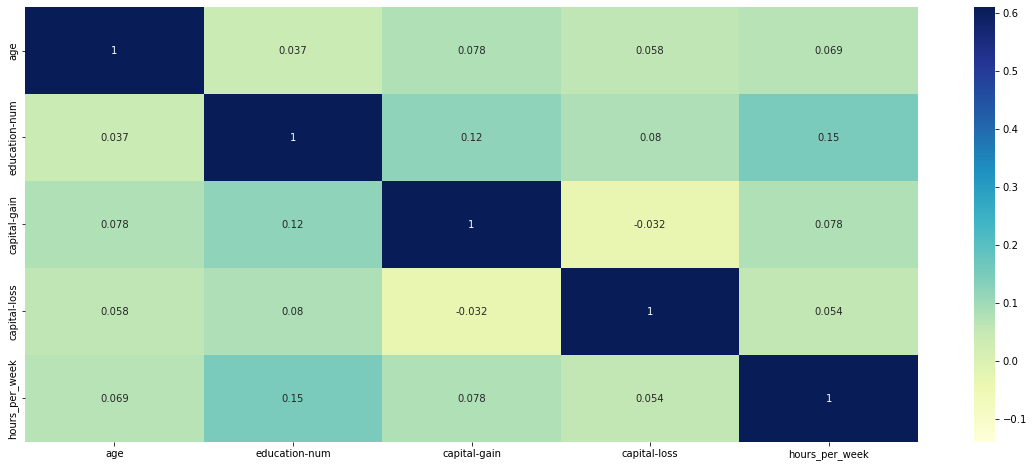

In [15]:
corrmatrix=sal_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

## Feature Reducton

In [16]:
 #Dropping irrelevant columns
sal_data=sal_data.drop(['education-num','capital-gain','capital-loss','native-country'],axis=1)
sal_data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [17]:
# Assigning the numerical columns to num_cols
num_cols =  sal_data.select_dtypes(["number"])

In [18]:
num_cols.head()

,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40


## Outlier Handling

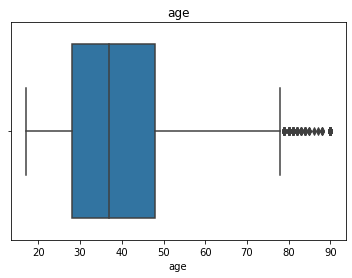

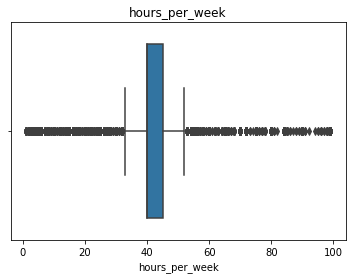

In [19]:
## checking outliers
for i in num_cols :
    plt.title(i)
    sns.boxplot(sal_data[i])
    plt.show()  

In [20]:
#Outlier Handling for the attribute Age
Q1=sal_data['age'].quantile(0.25) # 25th quantile
Q3=sal_data['age'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
sal_data['age'] = np.clip(sal_data['age'], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 

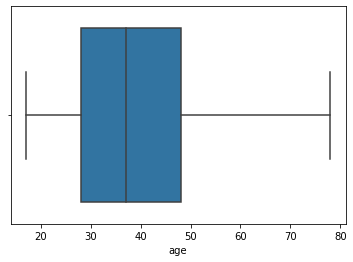

In [21]:
sns.boxplot(sal_data['age'])
plt.show()

Outlier clipped

In [22]:
sal_data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [23]:
sal_data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

## Data Visualization

**UNIVARITE ANALYSIS**

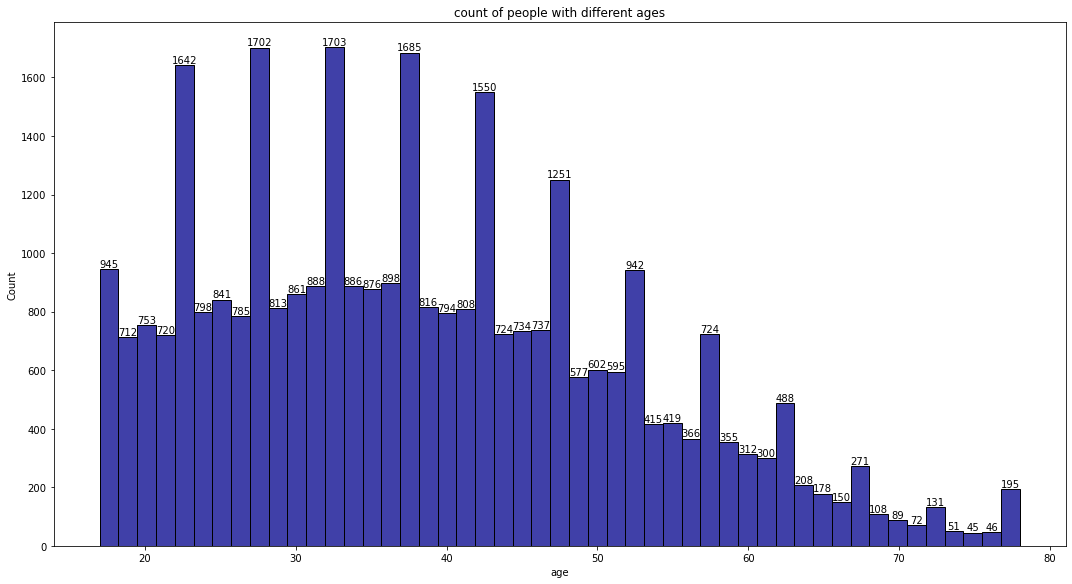

In [24]:
plt.figure(figsize=(15,8))
ax=sns.histplot(sal_data['age'],color='darkblue')
for p in ax.patches: 
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.tight_layout()
plt.title('count of people with different ages')
plt.show()

Most people are from 20-50 years of age

In [25]:
#we are defining a function for count plot
def labeled_countplot(a):
  plt.figure(figsize=(15,8))
  ax=sns.countplot(x=sal_data[a])
  total = len(sal_data)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', va='center')
  plt.tight_layout()
  plt.show()
  return

In [26]:
sal_data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'salary'],
      dtype='object')

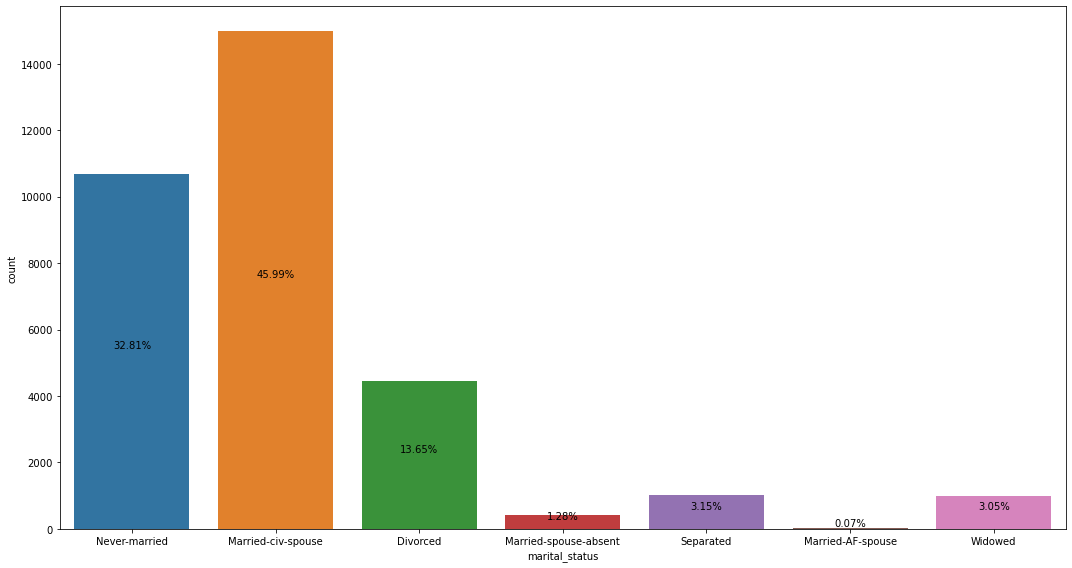

In [27]:
#plt.title('Marital Status')
labeled_countplot('marital_status')

45.99 % are Marreid-civ-spouse and 32.81 % are never-married

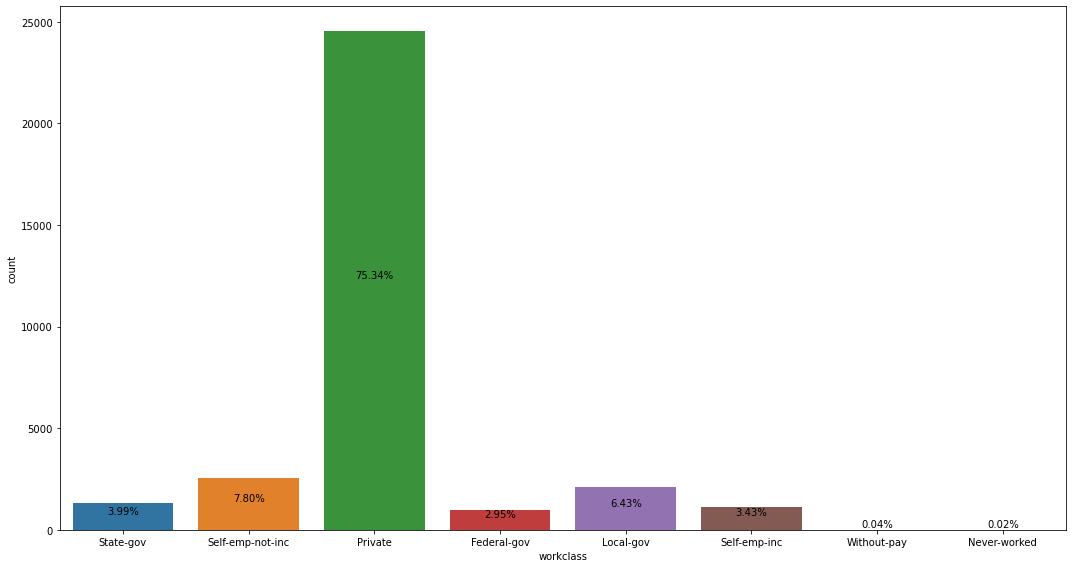

In [28]:
labeled_countplot('workclass')

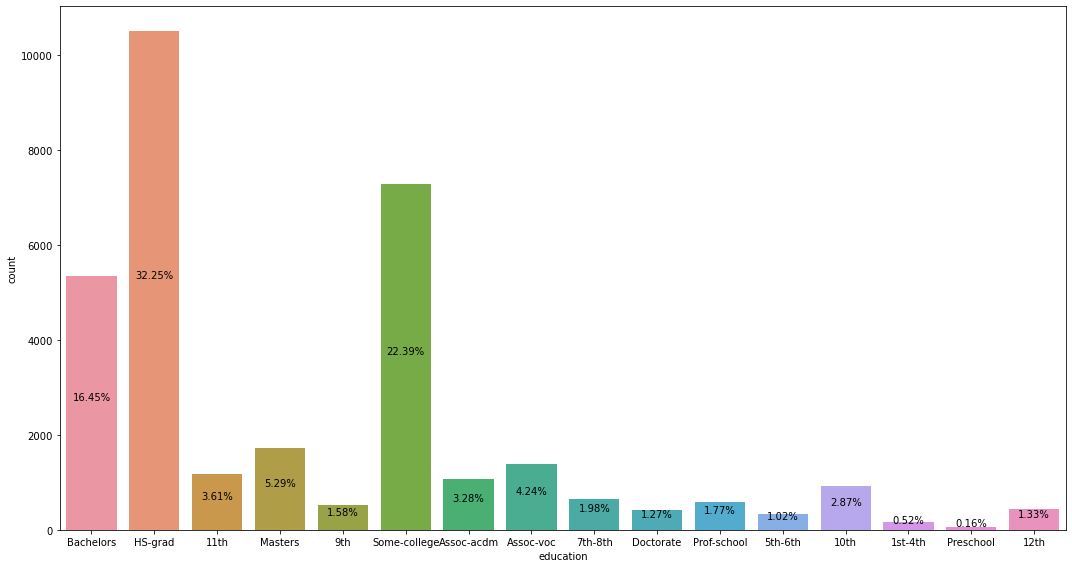

In [29]:

labeled_countplot('education')

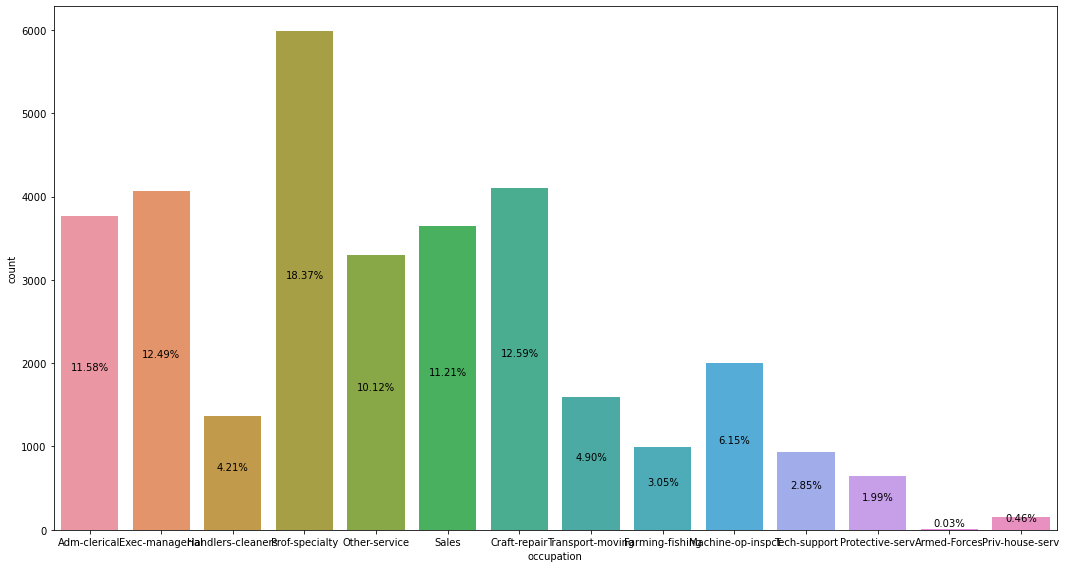

In [30]:

labeled_countplot('occupation')

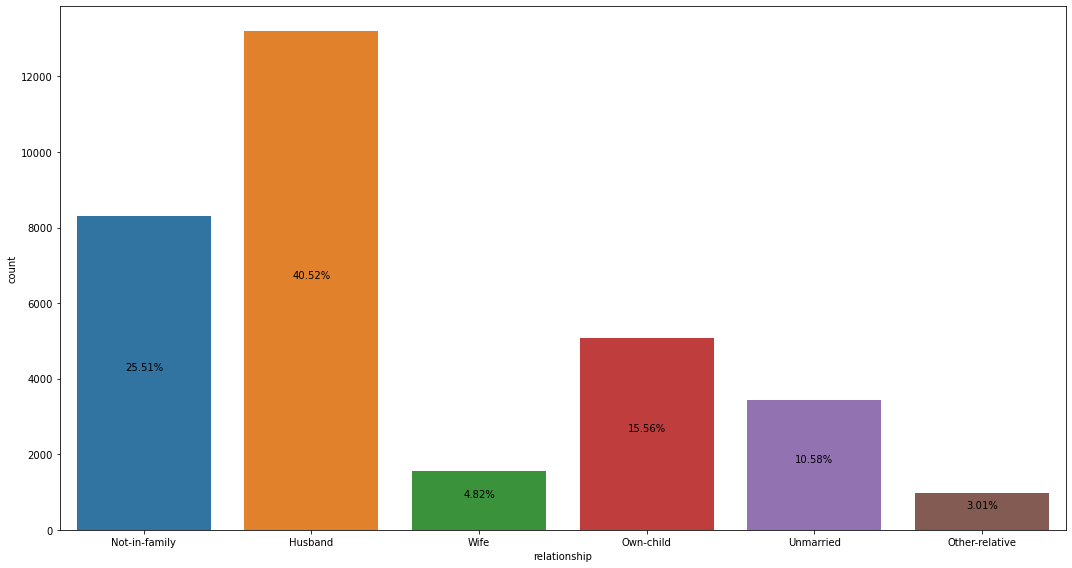

In [31]:

labeled_countplot('relationship')

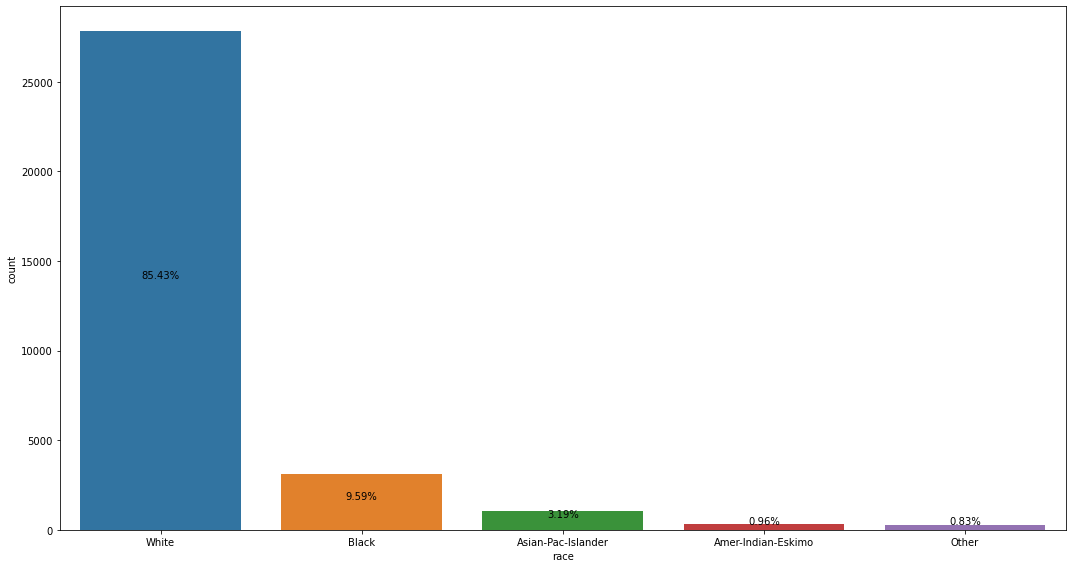

In [32]:

labeled_countplot('race')

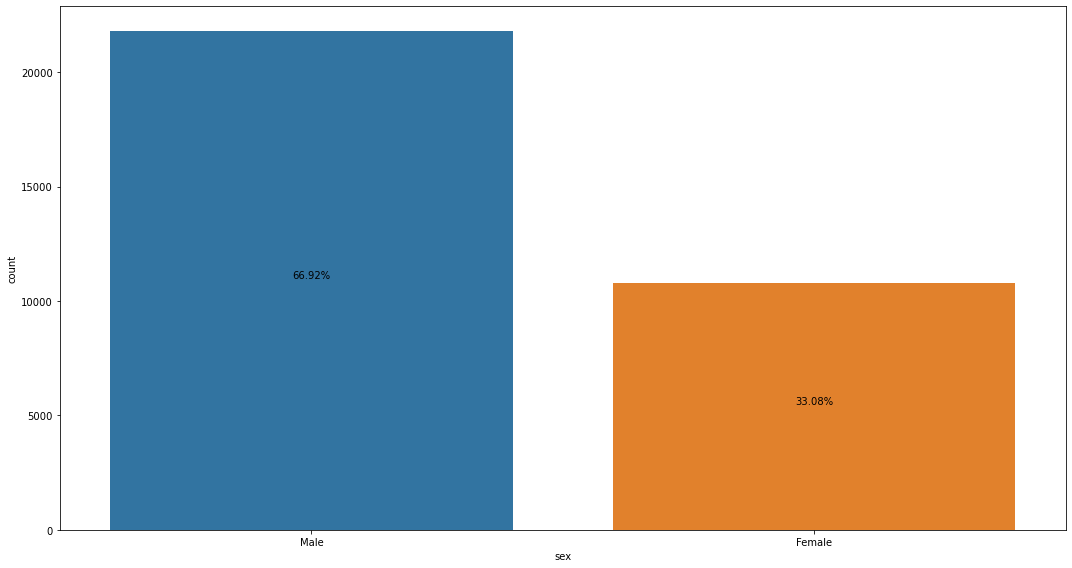

In [33]:

labeled_countplot('sex')

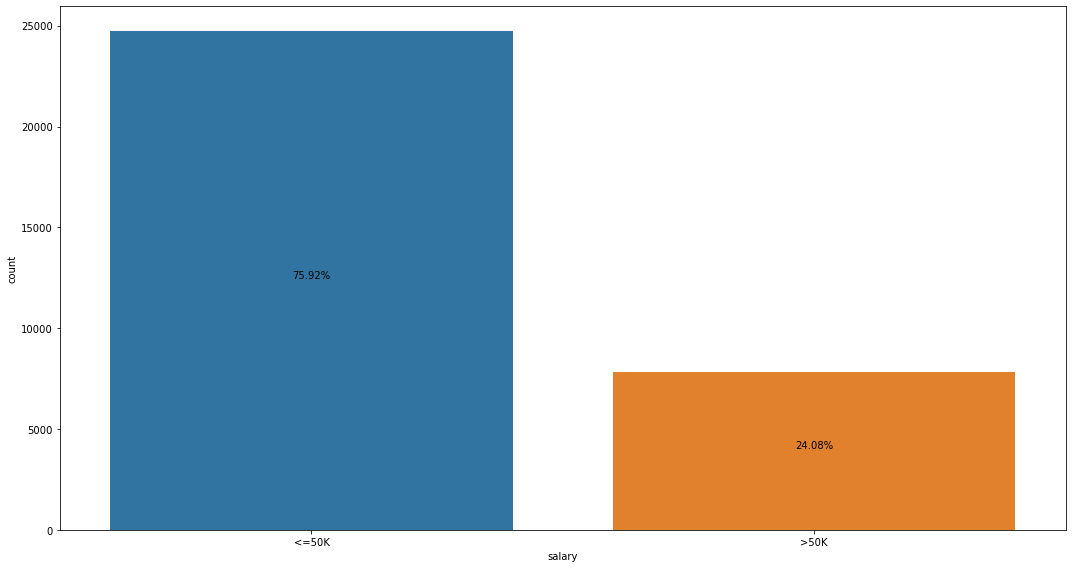

In [34]:

labeled_countplot('salary')

BIVARIATE

In [35]:
def labeled_bar(a,b):
    sns.set(style="ticks")
    ax=sns.barplot(x=sal_data[a],y=sal_data[b],color='b')
    plt.grid(color='b',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return

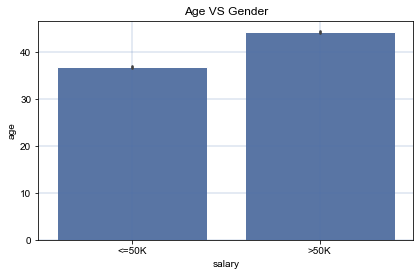

In [36]:
plt.title("Age VS Gender")
labeled_bar('salary','age')

## MULTIVARIATE

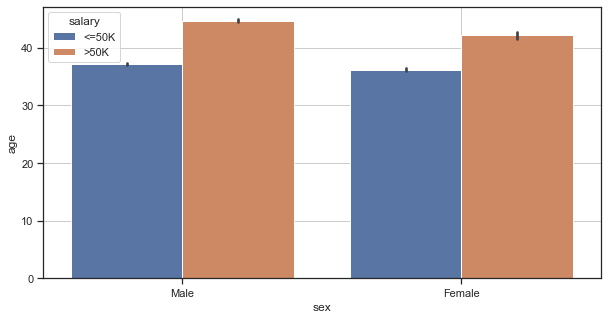

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['sex'],y=sal_data['age'],hue=sal_data['salary'])
plt.grid()
plt.show()

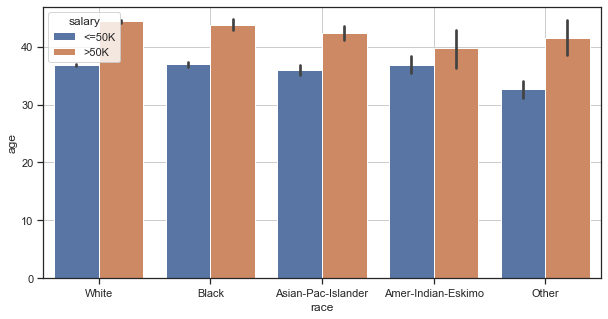

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['race'],y=sal_data['age'],hue=sal_data['salary'])
plt.grid()
plt.show()

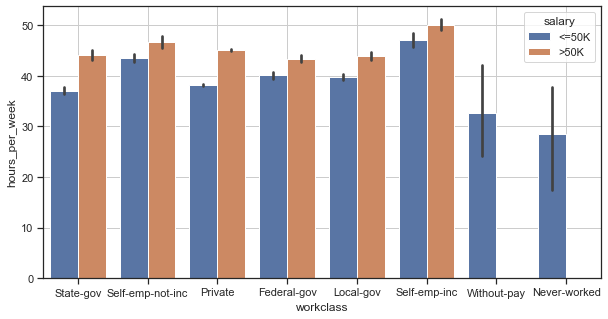

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['workclass'],y=sal_data['hours_per_week'],hue=sal_data['salary'])
plt.grid()
plt.show()

In [40]:
sal_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


## Feature Engineering

In [41]:
sal_data.salary = sal_data.salary.replace('<=50K',0)
sal_data.salary = sal_data.salary.replace('>50K',1)



In [42]:
sal_data.tail()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,0
32560,52.0,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,1


<AxesSubplot:>

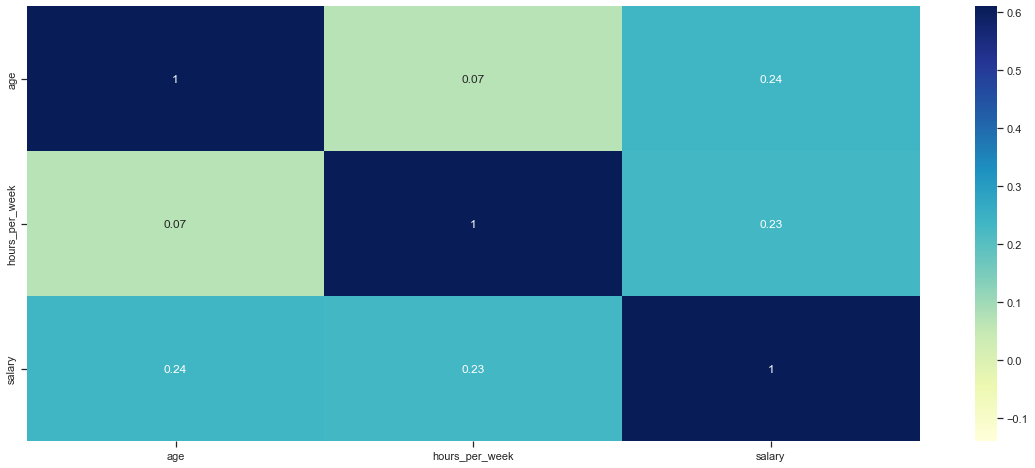

In [43]:
corrmatrix=sal_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

In [44]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   education       32561 non-null  object 
 3   marital_status  32561 non-null  object 
 4   occupation      32561 non-null  object 
 5   relationship    32561 non-null  object 
 6   race            32561 non-null  object 
 7   sex             32561 non-null  object 
 8   hours_per_week  32561 non-null  int64  
 9   salary          32561 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB


## PREPROCESSING

In [45]:
#Displayed the numerical columns
num_cols

,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32556,27,38
32557,40,40
32558,58,40
32559,22,20


In [46]:
#Statistical Summary of numerical columns
num_cols.describe()

,age,hours_per_week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


## ENCODING

In [47]:
#Unique values of education column
sal_data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

**Ordinal Encoding**

In [48]:
educ_dict = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Doctorate','Prof-school']

In [49]:
#Importing Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [50]:
ord_encoder=OrdinalEncoder(categories=[educ_dict])

In [51]:
#Fitting education column into ordinal encoder
ord_encoder.fit(sal_data[['education']])

OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'HS-grad', 'Some-college',
                            'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters',
                            'Doctorate', 'Prof-school']])

In [52]:
#Transforming education column
sal_data['education']=pd.DataFrame(ord_encoder.transform(sal_data[['education']]))

In [53]:
sal_data['education']

0        12.0
1        12.0
2         8.0
3         6.0
4        12.0
         ... 
32556    10.0
32557     8.0
32558     8.0
32559     8.0
32560     8.0
Name: education, Length: 32561, dtype: float64

In [54]:
#Assigning the value to sal_data1
sal_data1=sal_data['education']

In [55]:
sal_data1

0        12.0
1        12.0
2         8.0
3         6.0
4        12.0
         ... 
32556    10.0
32557     8.0
32558     8.0
32559     8.0
32560     8.0
Name: education, Length: 32561, dtype: float64

In [56]:
#Assigning categorical variables to cat_cols
cat_cols =  sal_data.select_dtypes(["object"])

In [57]:
#Displaying cat_cols
cat_cols

,workclass,marital_status,occupation,relationship,race,sex
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female
...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female
32559,Private,Never-married,Adm-clerical,Own-child,White,Male


**Label Encoding**

In [58]:
#Importing Label encoder
from sklearn.preprocessing import LabelEncoder
#Label encoding other categorical columns
label_encoder= LabelEncoder()
for i in cat_cols:
    cat_cols[i]=label_encoder.fit_transform(cat_cols[i])     


In [59]:
#Successfully encoded categorical columns
cat_cols

,workclass,marital_status,occupation,relationship,race,sex
0,6,4,0,1,4,1
1,5,2,3,0,4,1
2,3,0,5,1,4,1
3,3,2,5,0,2,1
4,3,2,9,5,2,0
...,...,...,...,...,...,...
32556,3,2,12,5,4,0
32557,3,2,6,0,4,1
32558,3,6,0,4,4,0
32559,3,4,0,3,4,1


In [63]:
label_encoder.fit(sal_data['workclass'])
print(label_encoder.classes_)

['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


In [64]:
label_encoder.fit(sal_data['marital_status'])
print(label_encoder.classes_)

['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


In [65]:
label_encoder.fit(sal_data['occupation'])
print(label_encoder.classes_)

['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


In [66]:
label_encoder.fit(sal_data['relationship'])
print(label_encoder.classes_)

['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']


In [67]:
label_encoder.fit(sal_data['race'])
print(label_encoder.classes_)

['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']


In [68]:
label_encoder.fit(sal_data['sex'])
print(label_encoder.classes_)

['Female' 'Male']


In [72]:
cat_cols['sex']

0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32561, dtype: int32

In [73]:
num_cols

,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32556,27,38
32557,40,40
32558,58,40
32559,22,20


In [74]:
sal_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39.0,State-gov,12.0,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50.0,Self-emp-not-inc,12.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38.0,Private,8.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53.0,Private,6.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28.0,Private,12.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,10.0,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40.0,Private,8.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58.0,Private,8.0,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22.0,Private,8.0,Never-married,Adm-clerical,Own-child,White,Male,20,0


In [75]:
#importing the preprocessing library and did normalization in num_cols
from sklearn import preprocessing
num_cols=preprocessing.normalize(num_cols)

In [76]:
#converting array to dataframe
num_cols=pd.DataFrame(num_cols,columns=['age','hours_per_week'])

In [77]:
#Dropped the encoded and normalized columns from the original dataset
sal_data=sal_data.drop(['workclass','education','marital_status','occupation','relationship','race','sex','age','hours_per_week'],axis=1)

In [78]:
sal_data

,salary
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [79]:
num_cols

,age,hours_per_week
0,0.698100,0.716000
1,0.967823,0.251634
2,0.688749,0.724999
3,0.798189,0.602407
4,0.573462,0.819232
...,...,...
32556,0.579207,0.815180
32557,0.707107,0.707107
32558,0.823213,0.567733
32559,0.739940,0.672673


In [80]:
num_cols.describe()

,age,hours_per_week
count,32561.000000,32561.000000
mean,0.669670,0.712823
std,0.140144,0.154226
min,0.188479,0.012345
25%,0.565528,0.640184
50%,0.668965,0.743294
75%,0.768221,0.824729
max,0.999924,0.982077


In [81]:
sal_data1

0        12.0
1        12.0
2         8.0
3         6.0
4        12.0
         ... 
32556    10.0
32557     8.0
32558     8.0
32559     8.0
32560     8.0
Name: education, Length: 32561, dtype: float64

In [82]:
sal_data

,salary
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [83]:
cat_cols

,workclass,marital_status,occupation,relationship,race,sex
0,6,4,0,1,4,1
1,5,2,3,0,4,1
2,3,0,5,1,4,1
3,3,2,5,0,2,1
4,3,2,9,5,2,0
...,...,...,...,...,...,...
32556,3,2,12,5,4,0
32557,3,2,6,0,4,1
32558,3,6,0,4,4,0
32559,3,4,0,3,4,1


In [84]:
#Concatenating numerical cols,encoded cols,target column
sal_data=pd.concat([num_cols,sal_data1,cat_cols,sal_data],axis=1)


In [85]:
sal_data

,age,hours_per_week,education,workclass,marital_status,occupation,relationship,race,sex,salary
0,0.698100,0.716000,12.0,6,4,0,1,4,1,0
1,0.967823,0.251634,12.0,5,2,3,0,4,1,0
2,0.688749,0.724999,8.0,3,0,5,1,4,1,0
3,0.798189,0.602407,6.0,3,2,5,0,2,1,0
4,0.573462,0.819232,12.0,3,2,9,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.579207,0.815180,10.0,3,2,12,5,4,0,0
32557,0.707107,0.707107,8.0,3,2,6,0,4,1,1
32558,0.823213,0.567733,8.0,3,6,0,4,4,0,0
32559,0.739940,0.672673,8.0,3,4,0,3,4,1,0


In [86]:
sal_data=sal_data[['age','workclass','education','marital_status','occupation','relationship','race','sex','hours_per_week','salary']]

In [87]:
sal_data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,0.698100,6,12.0,4,0,1,4,1,0.716000,0
1,0.967823,5,12.0,2,3,0,4,1,0.251634,0
2,0.688749,3,8.0,0,5,1,4,1,0.724999,0
3,0.798189,3,6.0,2,5,0,2,1,0.602407,0
4,0.573462,3,12.0,2,9,5,2,0,0.819232,0


In [88]:
#Displaying the bottom 5 rows
sal_data.tail()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
32556,0.579207,3,10.0,2,12,5,4,0,0.815180,0
32557,0.707107,3,8.0,2,6,0,4,1,0.707107,1
32558,0.823213,3,8.0,6,0,4,4,0,0.567733,0
32559,0.739940,3,8.0,4,0,3,4,1,0.672673,0
32560,0.792624,4,8.0,2,3,5,4,0,0.609711,1


In [89]:
#Checking for duplicated entries
sum(sal_data.duplicated(sal_data.columns))

5196

In [90]:
#Delete the duplicates and check that it worked
sal_data = sal_data.drop_duplicates(sal_data.columns, keep='last')
sum(sal_data.duplicated(sal_data.columns))

0

In [91]:
sal_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,0.698100,6,12.0,4,0,1,4,1,0.716000,0
1,0.967823,5,12.0,2,3,0,4,1,0.251634,0
2,0.688749,3,8.0,0,5,1,4,1,0.724999,0
3,0.798189,3,6.0,2,5,0,2,1,0.602407,0
4,0.573462,3,12.0,2,9,5,2,0,0.819232,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.579207,3,10.0,2,12,5,4,0,0.815180,0
32557,0.707107,3,8.0,2,6,0,4,1,0.707107,1
32558,0.823213,3,8.0,6,0,4,4,0,0.567733,0
32559,0.739940,3,8.0,4,0,3,4,1,0.672673,0


In [92]:
sal_data.isna().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
salary            0
dtype: int64

In [93]:
#Splitting into feature and target
x=sal_data.drop(['salary'], axis=1)
y=sal_data['salary']

In [94]:
#Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_info['Columns'] = x.columns
vif_info.sort_values('VIF', ascending = False)

,VIF,Columns
8,17.646226,hours_per_week
6,16.704465,race
0,16.532516,age
2,12.734099,education
1,7.871971,workclass
7,4.411008,sex
3,3.814760,marital_status
4,3.496752,occupation
5,2.867482,relationship


In [95]:
x.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week'],
      dtype='object')

In [96]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 27365, dtype: int64

In [97]:
x

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week
0,0.698100,6,12.0,4,0,1,4,1,0.716000
1,0.967823,5,12.0,2,3,0,4,1,0.251634
2,0.688749,3,8.0,0,5,1,4,1,0.724999
3,0.798189,3,6.0,2,5,0,2,1,0.602407
4,0.573462,3,12.0,2,9,5,2,0,0.819232
...,...,...,...,...,...,...,...,...,...
32556,0.579207,3,10.0,2,12,5,4,0,0.815180
32557,0.707107,3,8.0,2,6,0,4,1,0.707107
32558,0.823213,3,8.0,6,0,4,4,0,0.567733
32559,0.739940,3,8.0,4,0,3,4,1,0.672673


In [98]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**LOGISTIC REGRESSION**

In [99]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [100]:
#Logistic Regression Model
log_reg=LogisticRegression()
log_reg_model=log_reg.fit(x_train,y_train)
log_pred=log_reg_model.predict(x_test)

# Importing Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score
print('confusion matrix is:\n', confusion_matrix(y_test,log_pred))
print('accuracy score is:\n', accuracy_score(y_test,log_pred))

confusion matrix is:
 [[3888  278]
 [ 863  444]]
accuracy score is:
 0.7915220171752239


**KNN MODEL**


In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
metric_k=[]
neighbors=range(1,12)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_KNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

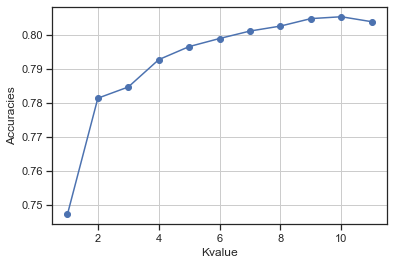

In [103]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [104]:
classifier=KNeighborsClassifier(n_neighbors=11)
classifier=classifier.fit(x_train,y_train)
y_pred_KNN=classifier.predict(x_test)

In [105]:
confusion_matrix(y_test,y_pred_KNN)

array([[3739,  427],
       [ 647,  660]], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred_KNN)

0.8037639320299653

**Random Forest Classifier**

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

In [109]:
confusion_matrix(y_test,y_pred_rf)

array([[3653,  513],
       [ 686,  621]], dtype=int64)

In [110]:
accuracy_score(y_test,y_pred_rf)

0.7809245386442536

**BAGGING CLASSIFIER**

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [112]:
bagging=BaggingClassifier(random_state=42)
bagging_model=bagging.fit(x_train,y_train)
bagging_pred=bagging_model.predict(x_test)

In [113]:
confusion_matrix(y_test,bagging_pred)

array([[3678,  488],
       [ 733,  574]], dtype=int64)

In [114]:
print('accuracy score is:\n',accuracy_score(y_test,bagging_pred))

accuracy score is:
 0.7769048054083684


**ADA BOOST CLASSIFIER**

In [115]:
# adaboost classifier
abc = AdaBoostClassifier(random_state=1)
abc_model=abc.fit(x_train,y_train)
abc_pred=abc_model.predict(x_test)

In [116]:
confusion_matrix(y_test,abc_pred)

array([[3859,  307],
       [ 702,  605]], dtype=int64)

In [117]:
print('accuracy score is:\n',accuracy_score(y_test,abc_pred))

accuracy score is:
 0.8156404165905353


**DECISION TREE CLASSIFIER**

In [118]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [119]:
confusion_matrix(y_test,y_pred_dt)

array([[3504,  662],
       [ 725,  582]], dtype=int64)

In [120]:
print('accuracy score is:\n',accuracy_score(y_test,y_pred_dt))

accuracy score is:
 0.7465740909921432


**Gradient Boosting Classifier**

In [121]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_model=gb_classifier.fit(x_train,y_train)
gb_pred=gb_model.predict(x_test)

In [122]:
confusion_matrix(y_test,gb_pred)

array([[3851,  315],
       [ 656,  651]], dtype=int64)

In [123]:
print('accuracy score is:\n',accuracy_score(y_test,gb_pred))

accuracy score is:
 0.8225835921797917


**HYPERPARAMETER TUNING RANDOMIZED SEARCH CV**

In [124]:
gb=GradientBoostingClassifier()
parameters={'learning_rate':[0.011,0.1,0.2,0.21,0.3,0.35],
            # [0.1,0.5,1,10,100],
             'n_estimators': [5,50,250,500,1000,1250,1500,1750],
            'max_depth': [1,3,5,7,9]}

In [125]:
clf=RandomizedSearchCV(estimator=gb,param_distributions=parameters,cv=2,n_iter=10,n_jobs=-1)
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.011, 0.1, 0.2, 0.21,
                                                          0.3, 0.35],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500, 1000,
                                                         1250, 1500, 1750]})

In [126]:
print("Results from Random Search CV  \n")
print("\n The best estimator across all searched params :  \n",clf.best_estimator_)
print("\n The best score across all searched params :  \n",clf.best_score_)
print("\n The best parameters across all searched params :  \n",clf.best_params_)

Results from Random Search CV  


 The best estimator across all searched params :  
 GradientBoostingClassifier(learning_rate=0.011, n_estimators=1000)

 The best score across all searched params :  
 0.8272428284304769

 The best parameters across all searched params :  
 {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.011}


In [136]:
gb_classifier1 = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.011,max_depth=3)
gb_model1=gb_classifier1.fit(x_train,y_train)
gb_pred_rcv=gb_model1.predict(x_test)

In [137]:
confusion_matrix(y_test,gb_pred_rcv)

array([[3851,  315],
       [ 661,  646]], dtype=int64)

In [138]:
print('accuracy score is:\n',accuracy_score(y_test,gb_pred_rcv))

accuracy score is:
 0.8216700164443632


**XG Boost Classifier**

In [139]:
xgb_classifier=XGBClassifier()
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model=xgb_classifier.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)

In [140]:
confusion_matrix(y_test,xgb_pred)

array([[3766,  400],
       [ 624,  683]], dtype=int64)

In [141]:
print('accuracy score is:\n',accuracy_score(y_test,xgb_pred))

accuracy score is:
 0.81289968938425


In [142]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression', accuracy_score(y_test,log_pred)], 
         ['KNN',accuracy_score(y_test , y_pred_KNN)],['Random Forest',accuracy_score(y_test,y_pred_rf)],
         ['Bagging',accuracy_score(y_test,bagging_pred)],['ADA Boost',accuracy_score(y_test,abc_pred)],
         ['Decision tree',accuracy_score(y_test,y_pred_dt)],['Gradient',accuracy_score(y_test,gb_pred)], 
         ['XGB',accuracy_score(y_test,xgb_pred)]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │   0.791522 │
├─────────────────────┼────────────┤
│ KNN                 │   0.803764 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.780925 │
├─────────────────────┼────────────┤
│ Bagging             │   0.776905 │
├─────────────────────┼────────────┤
│ ADA Boost           │   0.81564  │
├─────────────────────┼────────────┤
│ Decision tree       │   0.746574 │
├─────────────────────┼────────────┤
│ Gradient            │   0.822584 │
├─────────────────────┼────────────┤
│ XGB                 │   0.8129   │
╘═════════════════════╧════════════╛


**Best Accuracy is for Gradient Boosting Algorithm. So creating pickle file for Gradient boosting classifier**

In [143]:
py_flask=GradientBoostingClassifier()
py_flask.fit(x,y)

GradientBoostingClassifier()

In [144]:
#saving model
import pickle
pickle.dump(py_flask,open('flask_gb_model.pkl',"wb"))